# Pytorch Framework for Multi-class Text Classification

## BBC News Classification - 5 Class Problem

* Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
* Class Labels: 5 <br/>

    0 - Business <br/>
    1 - Sport <br/>
    2 - Politics <br/> 
    3 - Tech <br/>
    4 - Entertainment 

## Reading Data

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append("..")
pd.set_option('display.max_colwidth', -1)

In [2]:
df_train = pd.read_csv('../datasets/bbcfull/train.csv')
df_test = pd.read_csv('../datasets/bbcfull/test.csv')
df_score = pd.read_csv('../datasets/bbcfull/test_with_label.csv')
df_val = pd.read_csv('../datasets/bbcfull/dev.csv')
df_train.shape, df_test.shape, df_val.shape

((1424, 3), (445, 2), (356, 3))

In [3]:
df_train.label.value_counts()

1    327
0    326
2    267
3    257
4    247
Name: label, dtype: int64

In [4]:
df_val.label.value_counts()

1    82
0    82
2    66
3    64
4    62
Name: label, dtype: int64

In [5]:
df_score.label.value_counts()

1    102
0    102
2    84 
3    80 
4    77 
Name: label, dtype: int64

## Training Transformers (Albert | Roberta | DistilBert) classifier with FrameWork

In [6]:
from classitransformers.report import metrics
from classitransformers.configs import Configs
from classitransformers.pytransformers import TransformersClassification

## Set Configurations

* Pre-trained folderpath
* labels list
* train, test and eval batch size
* max_seq_len - how long is the each text input sentence !!
* data_dir - data path folder (optional)
* output_dir - output path folder (optional)

In [7]:
config = Configs(
                pretrained_model_dir = '../models/Roberta',
                model_name = 'roberta',
                num_train_epochs=3,
                train_batch_size = 16,
                eval_batch_size = 8, 
                do_train = True, 
                do_eval = True, 
                max_seq_length = 256,
                label_list = ["0", "1", "2", "3", "4"],
                data_dir = '../datasets/bbcfull',
                output_dir = '../transformers_output_bbcnews/')

In [8]:
model = TransformersClassification(config)

## Train Method

In [9]:
model.train()


======== Epoch 1 / 3 ========
Training...
  Batch    40  of     89.    Elapsed: 0:00:52.
  Batch    80  of     89.    Elapsed: 0:01:44.

  Average training loss: 0.59
  Training epcoh took: 0:01:56

Running Validation...
  Accuracy: 0.99
  Validation Loss: 0.00
  Validation took: 0:00:10

======== Epoch 2 / 3 ========
Training...
  Batch    40  of     89.    Elapsed: 0:00:52.
  Batch    80  of     89.    Elapsed: 0:01:44.

  Average training loss: 0.07
  Training epcoh took: 0:01:56

Running Validation...
  Accuracy: 0.98
  Validation Loss: 0.00
  Validation took: 0:00:10

======== Epoch 3 / 3 ========
Training...
  Batch    40  of     89.    Elapsed: 0:00:52.
  Batch    80  of     89.    Elapsed: 0:01:44.

  Average training loss: 0.03
  Training epcoh took: 0:01:56

Running Validation...
  Accuracy: 0.98
  Validation Loss: 0.00
  Validation took: 0:00:10
Saving model to ../transformers_output_bbcnews/

Training complete!
Total training took 0:06:25 (h:mm:ss)


## Test Method

In [10]:
prediction = model.test()

**Testing a sentence, takes a list of sentences.**

In [11]:
model.text_inference(['He is very good in writing a book on financial investment money making strategy. There are some transactional charges but the profit we make is awesome. The business people are exchanging bulk money over trades happening every seconds. Even retailers are happy doing trade and adding sum to their investments.'])

[array([0.99918574, 0.19028524, 0.2688493 , 0.23254088, 0.17762943],
       dtype=float32)]

In [12]:
y_pred = [np.argmax(tup) for tup in prediction]
y = df_score.label

## Accuracy and Report



Accuracy: 0.984
Precision: 0.984
Recall: 0.985
F1-Score: 0.985


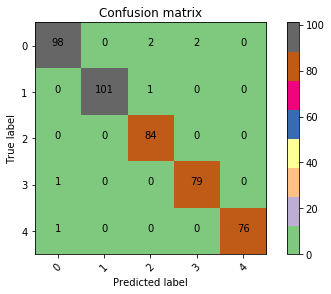

In [13]:
metrics(y, y_pred)